In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df=pd.read_csv("sales.csv")

In [3]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [5]:
df['qty_ordered'].value_counts()

qty_ordered
2.0      184214
3.0       43685
1.0       17572
6.0        9960
4.0        8457
          ...  
71.0          1
188.0         1
187.0         1
32.0          1
381.0         1
Name: count, Length: 72, dtype: int64

In [6]:
df.shape

(286392, 36)

In [13]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [8]:
df.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [14]:
df = df[['order_id', 'order_date', 'cust_id', 'Customer Since', 'qty_ordered', 'price', 'value', 'discount_amount', 'total']]



In [17]:
df.head() 

,order_id,order_date,cust_id,Customer Since,qty_ordered,price,value,discount_amount,total
0,100354678,2020-10-01,60124.0,8/22/2006,20.0,89.9,1798.0,0.0,1798.0
1,100354678,2020-10-01,60124.0,8/22/2006,10.0,19.0,190.0,0.0,190.0
2,100354680,2020-10-01,60124.0,8/22/2006,8.0,149.9,1199.2,0.0,1199.2
3,100354680,2020-10-01,60124.0,8/22/2006,8.0,79.9,639.2,0.0,639.2
4,100367357,2020-11-13,60124.0,8/22/2006,1.0,99.9,99.9,0.0,99.9


In [16]:
df['qty_ordered']=df['qty_ordered']-1

In [19]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df['Customer Since'] = pd.to_datetime(df['Customer Since'], format='%m/%d/%Y')

In [26]:
df.head()

,order_id,order_date,cust_id,Customer Since,qty_ordered,total
0,100354678,2020-10-01,60124.0,2006-08-22,20,1798.0
1,100354678,2020-10-01,60124.0,2006-08-22,10,190.0
2,100354680,2020-10-01,60124.0,2006-08-22,8,1199.2
3,100354680,2020-10-01,60124.0,2006-08-22,8,639.2
4,100367357,2020-11-13,60124.0,2006-08-22,1,99.9


In [25]:
df['qty_ordered']= df['qty_ordered'].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        286392 non-null  object        
 1   order_date      286392 non-null  datetime64[ns]
 2   cust_id         286392 non-null  float64       
 3   Customer Since  286392 non-null  datetime64[ns]
 4   qty_ordered     286392 non-null  int64         
 5   total           286392 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 13.1+ MB


In [28]:
print(df.duplicated().sum())

12420


In [29]:
df=df.drop_duplicates()

In [30]:
print(df.duplicated().sum())

0


In [31]:
df.columns = ['order_id', 'order_date', 'customer_id', 'customer_since', 'quantity', 'total_sales']

In [34]:
df.describe(include='all')

,order_id,order_date,customer_id,customer_since,quantity,total_sales
count,273972.0,273972,273972.00000,273972,273972.000000,273972.000000
unique,201716.0,NaN,NaN,NaN,NaN,NaN
top,100555234.0,NaN,NaN,NaN,NaN,NaN
freq,37.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,2021-03-12 13:42:06.196838144,70270.58529,2007-10-03 03:22:51.030616064,1.988057,844.366027
min,NaN,2020-10-01 00:00:00,4.00000,1978-11-04 00:00:00,0.000000,0.000000
25%,NaN,2020-12-24 00:00:00,57088.00000,2002-08-08 00:00:00,1.000000,50.000000
50%,NaN,2021-03-16 00:00:00,74395.50000,2010-03-13 00:00:00,1.000000,154.500000
75%,NaN,2021-05-18 00:00:00,92548.00000,2015-01-01 00:00:00,2.000000,875.000000
max,NaN,2021-09-30 00:00:00,115326.00000,2017-07-28 00:00:00,500.000000,101262.590000


In [35]:
data = pd.DataFrame(
    df.groupby(["order_date", "customer_id", "order_id"])
      .agg({'customer_since': min, 'quantity': sum, 'total_sales': sum})
).reset_index()

In [46]:
data.head()

,order_date,customer_id,order_id,acquired_year,quantity,total_sales
0,2020-10,16.0,100354886,1995,2,1243.7
1,2020-10,459.0,100354872,2014,0,0.0
2,2020-10,485.0,100354747,2014,12,165.0
3,2020-10,800.0,100354828,2002,1,185.0
4,2020-10,1562.0,100354794,2002,2,2790.0


In [44]:
data.customer_since = data.customer_since.astype('str')
data.customer_since = data.customer_since.astype('int64')

In [54]:
data=data.rename(columns={'customer_since': 'acquired_year'})
data=data.rename(columns={'order_date': 'order_month'})

In [55]:
data['acquired_year_bins'] = pd.cut(x=data.acquired_year, bins= list(range(np.min(data.acquired_year), np.max(data.acquired_year) +5, 5)))


In [73]:
data.head()

,order_month,customer_id,order_id,acquired_year,quantity,total_sales,acquired_year_bins
0,2020-10,16.0,100354886,1995,2,1243.7,"(1993, 1998]"
1,2020-10,459.0,100354872,2014,0,0.0,"(2013, 2018]"
2,2020-10,485.0,100354747,2014,12,165.0,"(2013, 2018]"
3,2020-10,800.0,100354828,2002,1,185.0,"(1998, 2003]"
4,2020-10,1562.0,100354794,2002,2,2790.0,"(1998, 2003]"


In [50]:
total_customers_by_bin = pd.DataFrame(
    data.groupby('acquired_year_bins', as_index=False)
      .agg({'customer_id': 'nunique'})
)

total_customers_by_bin.columns = ['acquired_year_bins', 'unique_customers']

In [51]:
total_customers_by_bin

,acquired_year_bins,unique_customers
0,"(1978, 1983]",648
1,"(1983, 1988]",1891
2,"(1988, 1993]",3393
3,"(1993, 1998]",5074
4,"(1998, 2003]",7261
5,"(2003, 2008]",10583
6,"(2008, 2013]",15527
7,"(2013, 2018]",19865


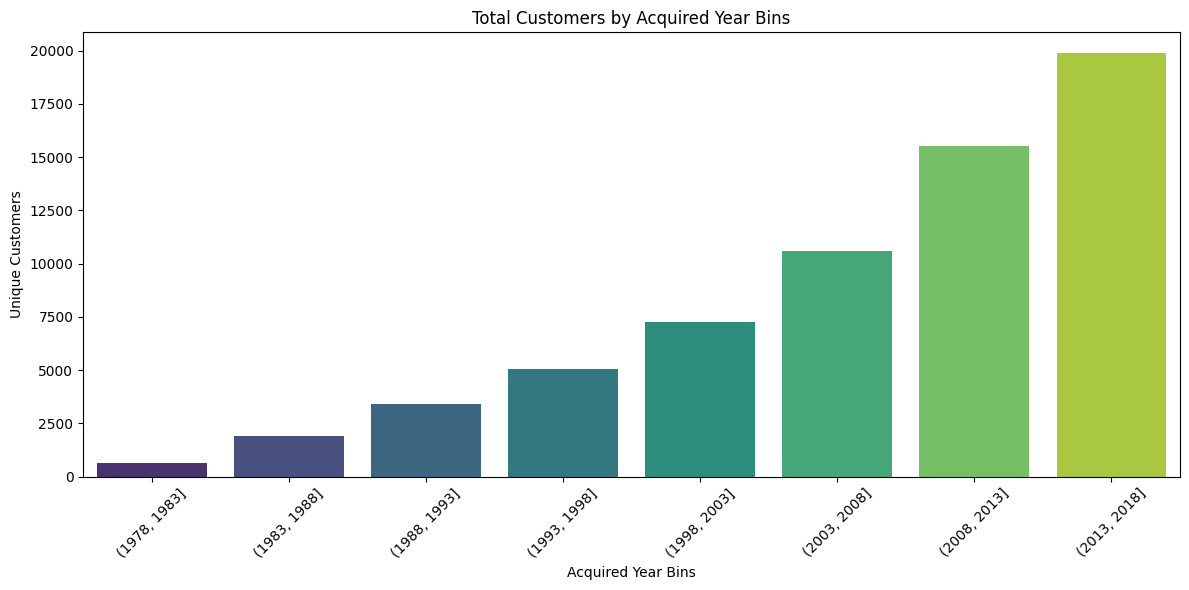

In [52]:
fig = plt.figure(figsize=(12, 6))
sns.barplot(x='acquired_year_bins', y='unique_customers', data=total_customers_by_bin, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Customers by Acquired Year Bins')
plt.xlabel('Acquired Year Bins')
plt.ylabel('Unique Customers')
plt.tight_layout()
plt.show()

Cohort by Customer_id

In [57]:
cohort_matrix = pd.pivot_table(data,
                             index='acquired_year_bins',
                             columns= 'order_month',
                             values='customer_id',
                             aggfunc=pd.Series.nunique)

cohort_matrix

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",32,50,208,54,33,78,139,53,80,33,30,29
"(1983, 1988]",106,155,632,163,91,241,409,148,223,133,98,96
"(1988, 1993]",163,298,1139,282,192,429,739,297,402,198,183,191
"(1993, 1998]",234,412,1758,405,269,649,1139,428,552,302,280,269
"(1998, 2003]",357,624,2471,643,357,871,1649,567,782,450,344,376
"(2003, 2008]",530,844,3565,916,556,1294,2361,952,1156,647,540,577
"(2008, 2013]",772,1333,5199,1255,826,1942,3439,1338,1646,919,793,835
"(2013, 2018]",971,1635,6605,1670,1042,2509,4435,1757,2282,1188,986,1051


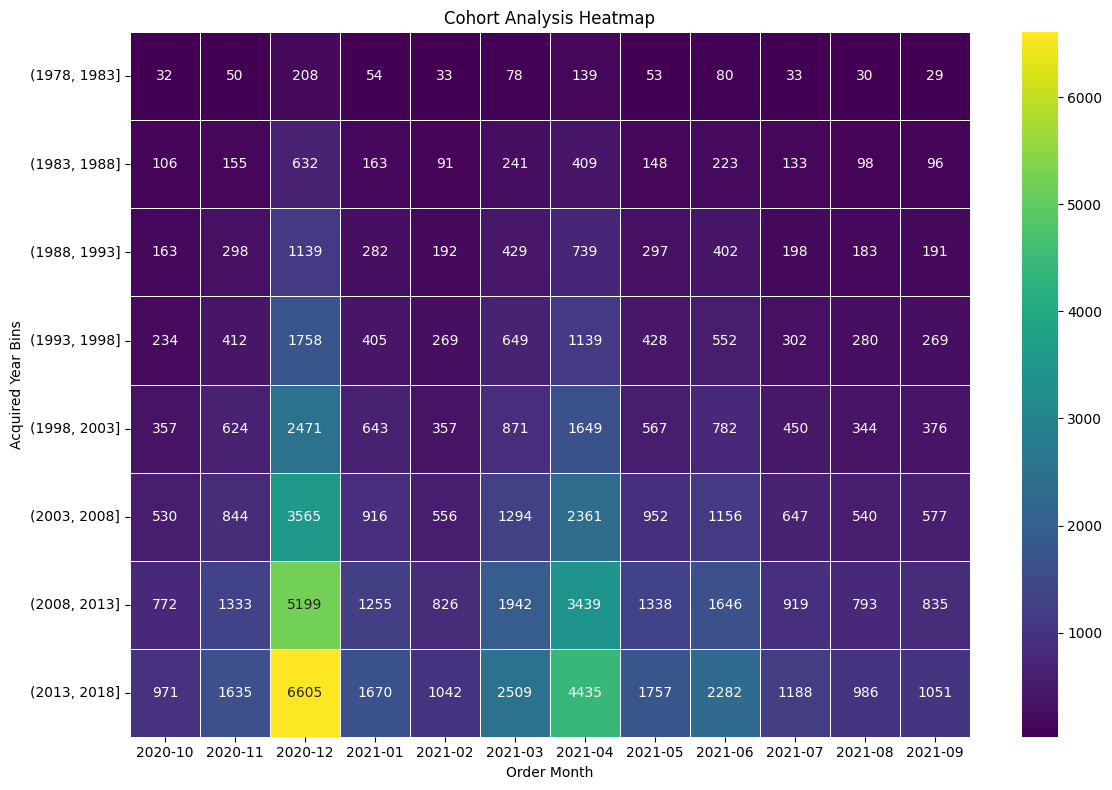

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_matrix, annot=True, fmt='.0f', cmap='viridis', linewidths=.5, ax=ax)
plt.title('Cohort Analysis Heatmap')    
plt.xlabel('Order Month')
plt.ylabel('Acquired Year Bins')
plt.tight_layout()
plt.show()

In [66]:
cohort_matrix_percentage = cohort_matrix.div(total_customers_by_bin.iloc[:,1].values, axis=0) * 100

In [67]:
cohort_matrix_percentage

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",4.938272,7.716049,32.098765,8.333333,5.092593,12.037037,21.450617,8.179012,12.345679,5.092593,4.629630,4.475309
"(1983, 1988]",5.605500,8.196721,33.421470,8.619778,4.812269,12.744580,21.628768,7.826547,11.792702,7.033316,5.182443,5.076679
"(1988, 1993]",4.804008,8.782788,33.569113,8.311229,5.658709,12.643678,21.780136,8.753316,11.847922,5.835544,5.393457,5.629237
"(1993, 1998]",4.611746,8.119827,34.647221,7.981868,5.301537,12.790698,22.447773,8.435160,10.878991,5.951912,5.518329,5.301537
"(1998, 2003]",4.916678,8.593858,34.031125,8.855530,4.916678,11.995593,22.710370,7.808842,10.769866,6.197493,4.737639,5.178350
"(2003, 2008]",5.008032,7.975054,33.686100,8.655391,5.253709,12.227157,22.309364,8.995559,10.923179,6.113578,5.102523,5.452140
"(2008, 2013]",4.971984,8.585045,33.483609,8.082695,5.319766,12.507245,22.148515,8.617247,10.600889,5.918722,5.107233,5.377729
"(2013, 2018]",4.887994,8.230556,33.249434,8.406746,5.245406,12.630254,22.325698,8.844702,11.487541,5.980367,4.963504,5.290712


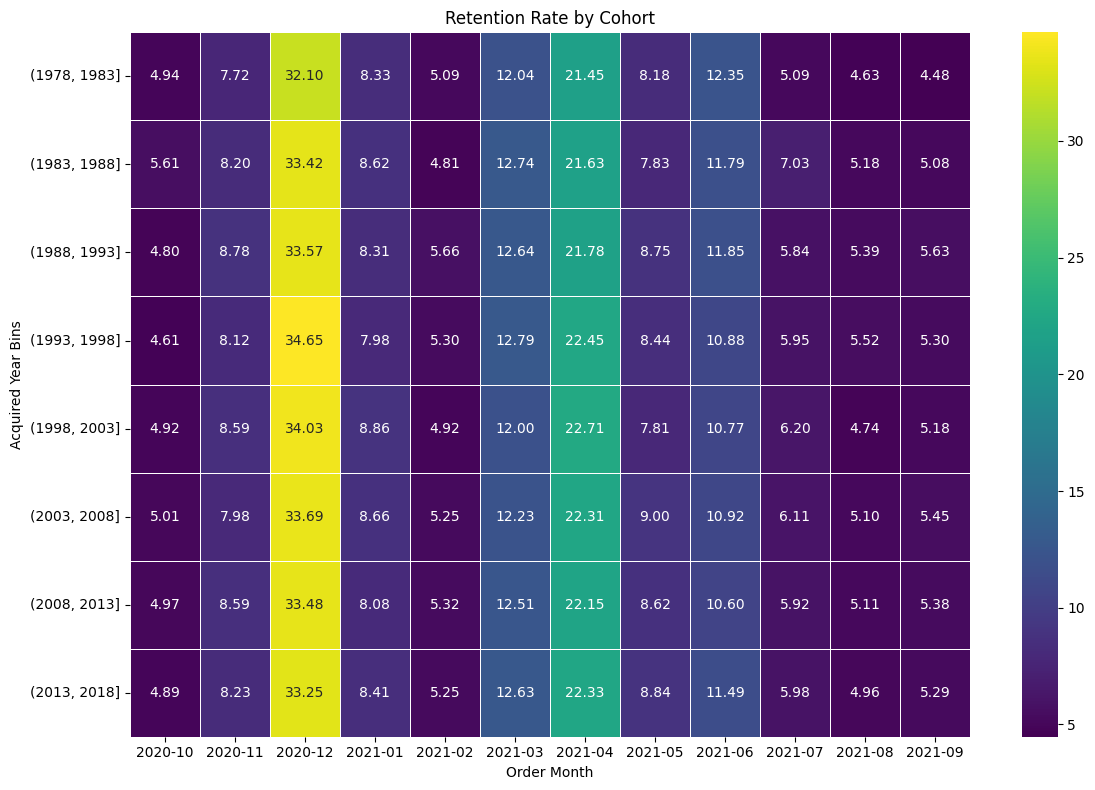

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_matrix_percentage, annot=True, fmt=".2f", cmap='viridis', linewidths=.5, ax=ax)
plt.title('Retention Rate by Cohort', fontsize = 12)   
plt.xlabel('Order Month')
plt.ylabel('Acquired Year Bins')
plt.tight_layout()
plt.show()

cohort by Quantity


In [75]:
cohort_matrix_quantity = pd.pivot_table(data,
                             index='acquired_year_bins',
                             columns='order_month',
                             values='quantity',
                             aggfunc=pd.Series.mean)

In [76]:
cohort_matrix_quantity

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",2.556886,2.000000,1.632979,1.833333,1.761194,3.094972,3.162791,2.369048,2.543011,2.576923,2.273973,1.351852
"(1983, 1988]",1.543307,1.836676,1.749713,2.040541,5.915254,3.527508,2.575170,2.293680,2.980360,3.959064,2.500000,2.302920
"(1988, 1993]",2.116838,1.953150,1.641206,2.139262,1.655696,3.301887,2.983342,2.009957,2.505564,4.729897,1.971774,3.060526
"(1993, 1998]",1.926829,2.163701,1.724381,2.578680,2.400826,4.380884,2.989416,3.275668,2.640000,3.965517,2.457108,3.889643
"(1998, 2003]",2.319035,1.936301,1.696901,2.352273,2.399445,3.592242,2.944705,2.417747,3.444133,3.434535,1.819475,3.013171
"(2003, 2008]",1.885142,1.993987,1.660930,2.515249,2.821592,3.898655,2.940719,3.485810,3.071231,4.685327,2.919112,3.699627
"(2008, 2013]",2.018909,2.166834,1.726257,3.181428,2.961221,3.610787,3.127356,3.178459,3.546080,4.113833,2.095945,3.115826
"(2013, 2018]",2.008289,2.215351,1.865097,2.795338,4.179474,3.762740,3.028821,3.523529,3.062510,3.880881,2.819182,4.472379


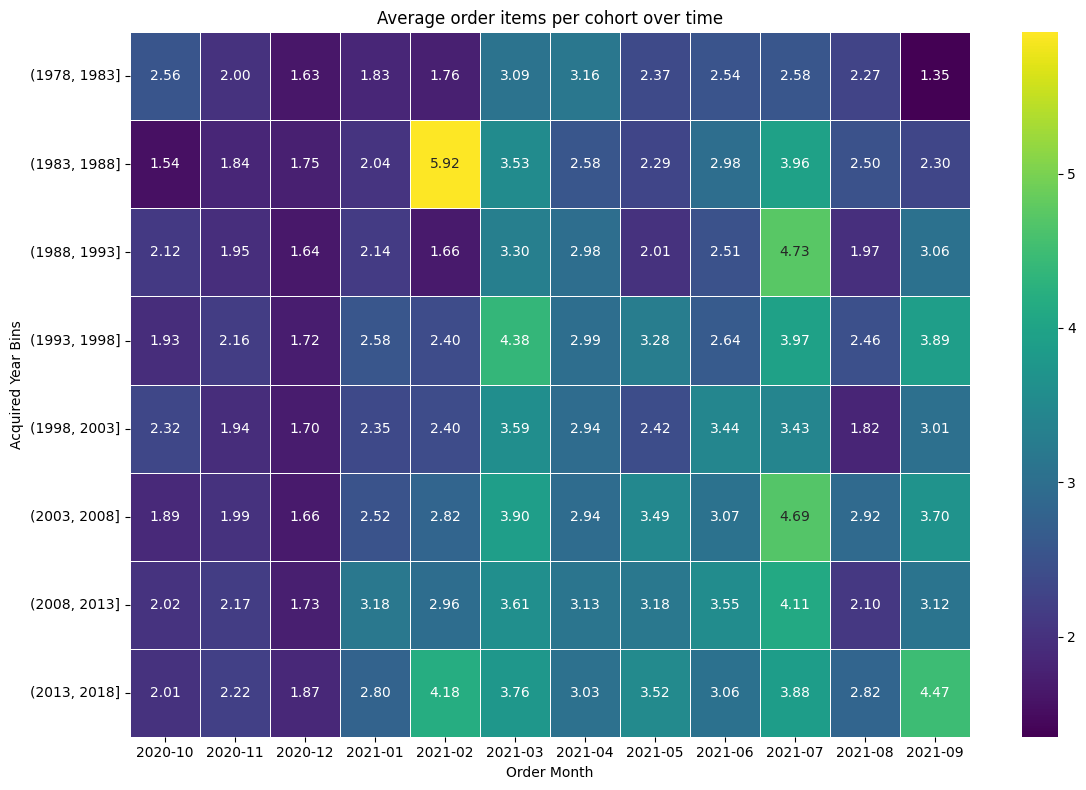

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_matrix_quantity, annot=True, fmt='.2f', cmap='viridis', linewidths=.5, ax=ax)
plt.title('Average order items per cohort over time', fontsize = 12)
plt.xlabel('Order Month')
plt.ylabel('Acquired Year Bins')
plt.tight_layout()
plt.show()


Cohorts by Revenue

In [82]:
cohort_matrix_revenue = pd.pivot_table(data,
                                index='acquired_year_bins',
                                columns='order_month',
                                values='total_sales',
                                aggfunc=pd.Series.median)
cohort_matrix_revenue

order_month,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
acquired_year_bins,,,,,,,,,,,,
"(1978, 1983]",272.9,600.0,623.30525,139.90,181.0,500.000,500.00,250.00,389.877,479.9000,375.785,257.4875
"(1983, 1988]",187.0,300.0,570.01500,171.20,189.8,526.175,471.52,227.40,282.400,164.8500,277.450,355.3500
"(1988, 1993]",166.5,440.0,566.91000,239.80,199.9,746.621,500.00,250.00,299.750,550.0000,1017.400,327.8750
"(1993, 1998]",183.9,280.0,479.90000,199.80,168.0,540.950,400.00,249.50,316.750,337.8750,734.500,324.4000
"(1998, 2003]",205.4,300.0,450.00000,179.90,169.9,520.200,400.00,250.00,309.700,276.9000,370.460,337.8750
"(2003, 2008]",185.3,465.0,549.85000,200.00,169.9,500.000,449.75,195.90,295.000,250.7500,196.800,380.0000
"(2008, 2013]",155.0,300.0,462.50000,181.28,149.9,456.640,400.00,200.00,242.630,287.1875,357.000,337.8750
"(2013, 2018]",199.9,300.0,446.85000,186.80,165.4,432.000,400.00,189.95,240.000,179.9000,337.875,283.0000


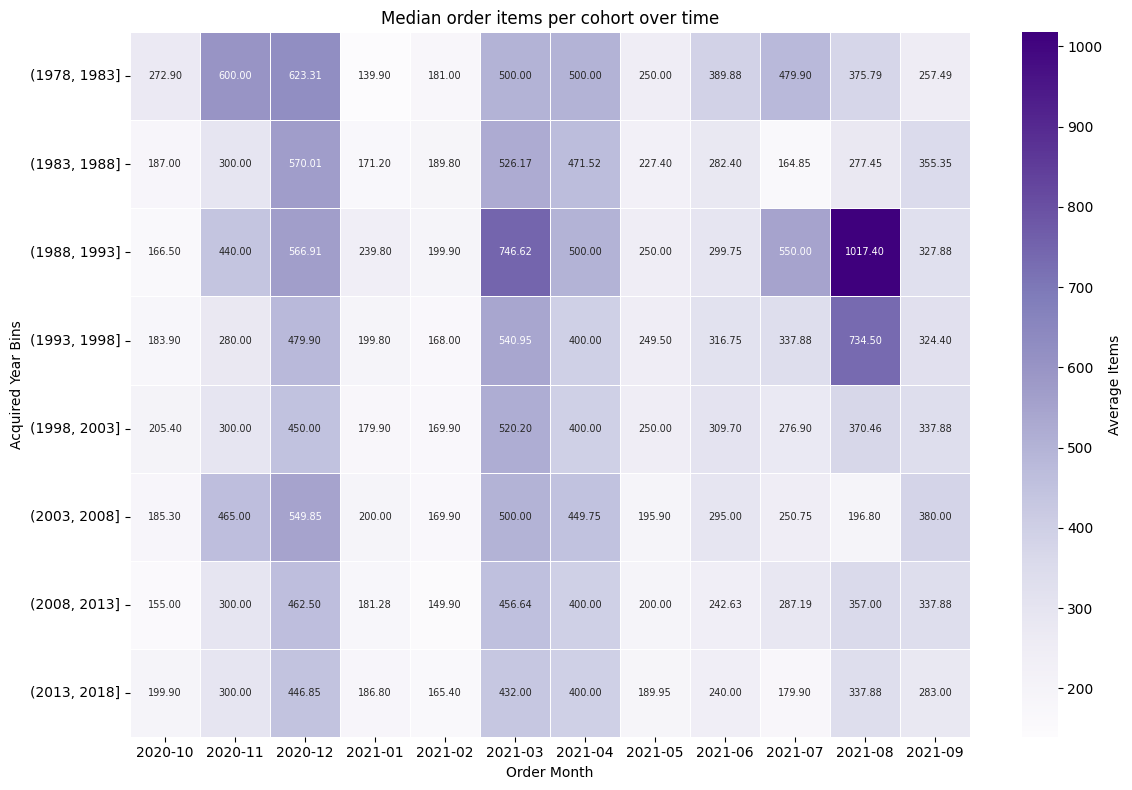

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_matrix_revenue, annot=True, annot_kws={"size": 7}, fmt=".2f", linewidths = .4, cmap="Purples", cbar_kws={'label': 'Average Items'}) 
plt.title('Median order items per cohort over time', fontsize = 12)
plt.xlabel('Order Month')
plt.ylabel('Acquired Year Bins')    
plt.tight_layout()
plt.show()